In [1]:
import pandas as pd

pd.show_versions()

C:\Users\marlrero\Anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.9.12.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : AMD64 Family 25 Model 33 Stepping 0, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : Korean_Korea.949

pandas           : 1.4.2
numpy            : 1.21.5
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 61.2.0
Cython           : 0.29.28
pytest           : 7.1.1
hypothesis       : None
sphinx           : 4.4.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.8.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 8.2.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.4
brotli    

In [2]:
raw_df = pd.read_csv("C:/Users/marlrero/owid-covid-data.csv")
# or 같은 폴더에 있다면
# raw_df = pd.read_csv('./owid_covid_data.csv')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337809 entries, 0 to 337808
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    337809 non-null  object 
 1   continent                                   321755 non-null  object 
 2   location                                    337809 non-null  object 
 3   date                                        337809 non-null  object 
 4   total_cases                                 300132 non-null  float64
 5   new_cases                                   328555 non-null  float64
 6   new_cases_smoothed                          327296 non-null  float64
 7   total_deaths                                278839 non-null  float64
 8   new_deaths                                  328611 non-null  float64
 9   new_deaths_smoothed                         327381 non-null  float64
 

In [4]:
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
# 원하는 열을 리스트로
selected_columns = ['iso_code', 'location', 'date', 
                    'total_cases', 'population']

# 원하는 열로 데이터프레임 생성
select_col_df = raw_df[selected_columns]

# 데이터 일부 확인
select_col_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-03,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,41128772.0


In [6]:
# location 열만 뽑기
locations = select_col_df['location']
locations

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
337804       Zimbabwe
337805       Zimbabwe
337806       Zimbabwe
337807       Zimbabwe
337808       Zimbabwe
Name: location, Length: 337809, dtype: object

In [7]:
type(locations)

pandas.core.series.Series

In [8]:
locations.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [9]:
type(locations.unique())

numpy.ndarray

In [10]:
kor_df = select_col_df[select_col_df.location == 'South Korea']
kor_df.head()

,iso_code,location,date,total_cases,population
281842,KOR,South Korea,2020-01-03,NaN,51815808.0
281843,KOR,South Korea,2020-01-04,NaN,51815808.0
281844,KOR,South Korea,2020-01-05,NaN,51815808.0
281845,KOR,South Korea,2020-01-06,NaN,51815808.0
281846,KOR,South Korea,2020-01-07,NaN,51815808.0


In [11]:
kor_date_idx_df = kor_df.set_index('date')
kor_date_idx_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-03,KOR,South Korea,NaN,51815808.0
2020-01-04,KOR,South Korea,NaN,51815808.0
2020-01-05,KOR,South Korea,NaN,51815808.0
2020-01-06,KOR,South Korea,NaN,51815808.0
2020-01-07,KOR,South Korea,NaN,51815808.0


In [12]:
# example 7
#usa_df = select_col_df[select_col_df.location == 'United States']
#usa_date_idx_df = usa_df.set_index('date')
#usa_date_idx_df
usa_date_idx_df = select_col_df[select_col_df.location == 'United States'].set_index('date')
usa_date_idx_df

,iso_code,location,total_cases,population
date,,,,
2020-01-03,USA,United States,NaN,338289856.0
2020-01-04,USA,United States,NaN,338289856.0
2020-01-05,USA,United States,NaN,338289856.0
2020-01-06,USA,United States,NaN,338289856.0
2020-01-07,USA,United States,NaN,338289856.0
...,...,...,...,...
2023-08-26,USA,United States,103436829.0,338289856.0
2023-08-27,USA,United States,103436829.0,338289856.0
2023-08-28,USA,United States,103436829.0,338289856.0


In [13]:
# line plot example
example_df = pd.DataFrame({
    'pig': [20, 18, 489, 675, 1776],
    'horse': [4, 25, 281, 600, 1900]
}, index=[1990, 1997, 2003, 2009, 2014])

example_df

,pig,horse
1990,20,4
1997,18,25
2003,489,281
2009,675,600
2014,1776,1900


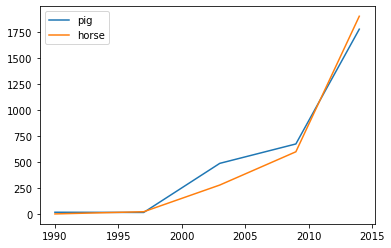

In [14]:
lines = example_df.plot.line()

In [15]:
kor_total = kor_date_idx_df['total_cases']
usa_total = usa_date_idx_df['total_cases']

In [16]:
kor_total

date
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
2020-01-06           NaN
2020-01-07           NaN
                 ...    
2023-08-26    34179800.0
2023-08-27    34179800.0
2023-08-28    34179800.0
2023-08-29    34179800.0
2023-08-30    34179800.0
Name: total_cases, Length: 1336, dtype: float64

In [17]:
usa_total

date
2020-01-03            NaN
2020-01-04            NaN
2020-01-05            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2023-08-26    103436829.0
2023-08-27    103436829.0
2023-08-28    103436829.0
2023-08-29    103436829.0
2023-08-30    103436829.0
Name: total_cases, Length: 1336, dtype: float64

In [18]:
kor_total.index

Index(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       ...
       '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
       '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30'],
      dtype='object', name='date', length=1336)

In [19]:
final_df = pd.DataFrame({
    'KOR': kor_total,
    'USA': usa_total
}, index=kor_total.index) # index는 usa_total.index도 상관없음

final_df

,KOR,USA
date,,
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
...,...,...
2023-08-26,34179800.0,103436829.0
2023-08-27,34179800.0,103436829.0
2023-08-28,34179800.0,103436829.0


<AxesSubplot:xlabel='date'>

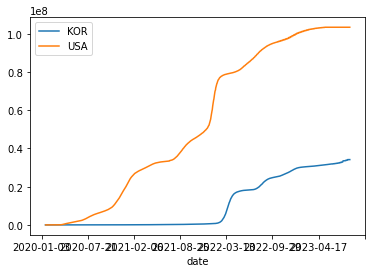

In [20]:
final_df.plot.line()

<AxesSubplot:xlabel='date'>

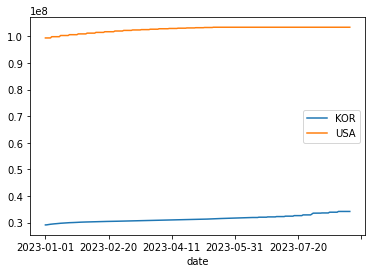

In [21]:
final_df['2023-01-01':].plot.line()

<AxesSubplot:xlabel='date'>

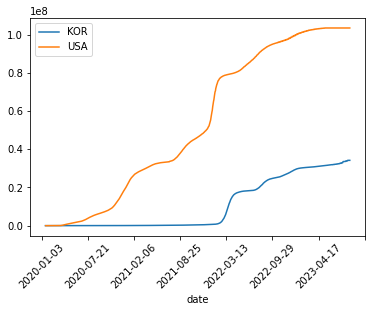

In [22]:
final_df.plot.line(rot=45)

In [23]:
kor_popu = kor_date_idx_df['population']['2023-01-01']
usa_popu = usa_date_idx_df['population']['2023-01-01']
print(f'한국인구: {kor_popu} 미국인구: {usa_popu}')

한국인구: 51815808.0 미국인구: 338289856.0


In [24]:
rate = round((usa_popu / kor_popu), 2) # 소수점 둘째자리까지
print(rate)

6.53


In [25]:
final_rate_df = pd.DataFrame({
    'KOR': kor_total * rate,
    'USA': usa_total
}, index=kor_date_idx_df.index)

final_rate_df['2023-01-01':]

,KOR,USA
date,,
2023-01-01,1.901327e+08,99411696.0
2023-01-02,1.902812e+08,99411696.0
2023-01-03,1.908105e+08,99411696.0
2023-01-04,1.913236e+08,99411696.0
2023-01-05,1.917422e+08,99411696.0
...,...,...
2023-08-26,2.231941e+08,103436829.0
2023-08-27,2.231941e+08,103436829.0
2023-08-28,2.231941e+08,103436829.0


<AxesSubplot:xlabel='date'>

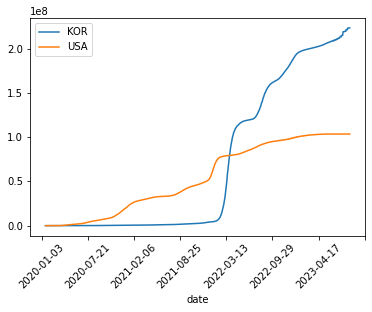

In [26]:
final_rate_df[:].plot.line(rot=45)

<AxesSubplot:xlabel='date'>

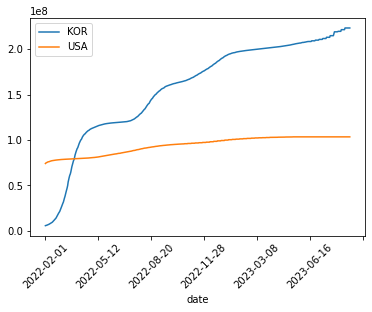

In [27]:
final_rate_df['2022-02-01':].plot.line(rot=45)